In [13]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, Sequential
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [14]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

--2024-01-20 17:02:58--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-01-20 17:02:59 (122 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



In [15]:
dataset = pd.read_csv('insurance.csv')

In [16]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df

In [17]:
X_test = dataset.sample(frac=0.2)
len(X_test)

268

In [18]:
X_train = dataset[~dataset.isin(X_test)].dropna()
len(X_train)

1070

In [19]:
y_train = X_train.pop("expenses")

In [20]:
y_test = X_test.pop("expenses")

In [21]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

model = Sequential()
model.add(normalizer)
model.add(layers.Dense(16))
model.add(layers.Dense(4))
model.add(layers.Dropout(.2))
model.add(layers.Dense(1))

In [22]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mae', metrics=['mae', 'mse'])
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198 (796.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 13 (56.00 Byte)
________________

In [23]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.5,
    verbose=0
)

print(history)

9/9 - 0s - loss: 3280.4487 - mae: 3280.4487 - mse: 36475588.0000 - 61ms/epoch - 7ms/step
Testing set Mean Abs Error: 3280.45 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


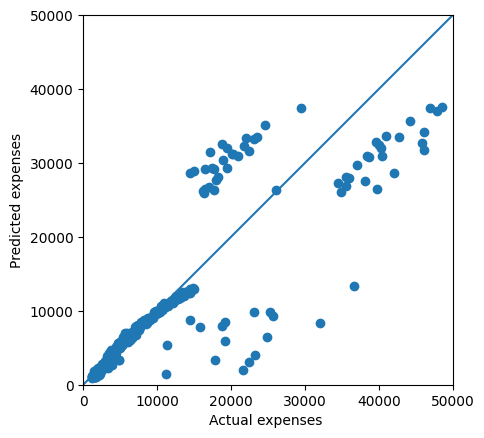

In [24]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual expenses ')
plt.ylabel('Predicted expenses')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
